In [17]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('../table/train_object.csv')

In [10]:
audio_features = list(filter(lambda x:'audio' in x, df.keys()))
print('audio features', len(audio_features))

video_features = list(filter(lambda x:'video' in x, df.keys()))
print('video features', len(video_features))

audio features 512
video features 1000


In [11]:
features = audio_features + video_features

In [12]:
df.shape

(151519, 1518)

In [15]:
df['y_id'] = df['y']>=1
df['y_id'].value_counts()

False    76000
True     75519
Name: y_id, dtype: int64

In [16]:
X = df[features].get_values()
y = df['y_id'].get_values()

In [88]:
# import pandas as pd
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense
# np.random.seed(7)


# input_shape = len(features)
# output_shape = 1

# model = Sequential()
# model.add(Dense(1024, input_dim=input_shape, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(output_shape, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# model.fit(X, y)

In [89]:
from keras.models import load_model
model = load_model('final_model.h5')

In [90]:
from tqdm import tqdm_notebook
def get_predictions(model, X, batch_size = 1024):
    y_predict = []
    for ind in tqdm_notebook(range(int(X.shape[0]/batch_size)+1)):
        #print(model.predict_proba(X[ind*batch_size : (ind+1)*batch_size]))
        y_predict.extend(model.predict_proba(X[ind*batch_size : 
                                               min((ind+1)*batch_size, X.shape[0])]
                                            )[:,0]
                        )
    return y_predict

y_predict = get_predictions(model, X, batch_size=1024)

In [97]:
df[:2].head()

,Unnamed: 0,IDu,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,...,video_994,video_995,video_996,video_997,video_998,video_999,idu2,y,y_id,p_id
0,0,-JfEJq56IwI0044,1.37962,0.623667,0.459552,0.131612,-0.117128,1.378955,0.300299,0.956826,...,1.353371e-06,0.000004,0.000005,9.585499e-07,0.000011,0.000206,-JfEJq56IwI0101,1,True,1.0
1,1,-JfEJq56IwI0044,1.37962,0.623667,0.459552,0.131612,-0.117128,1.378955,0.300299,0.956826,...,3.342150e-07,0.000001,0.000002,2.555071e-07,0.000002,0.000529,-JfEJq56IwI0068,1,True,1.0


In [95]:
model.predict(df[features][:2].get_values())

array([[1.],
       [1.]], dtype=float32)

In [91]:
df['p_id'] = y_predict

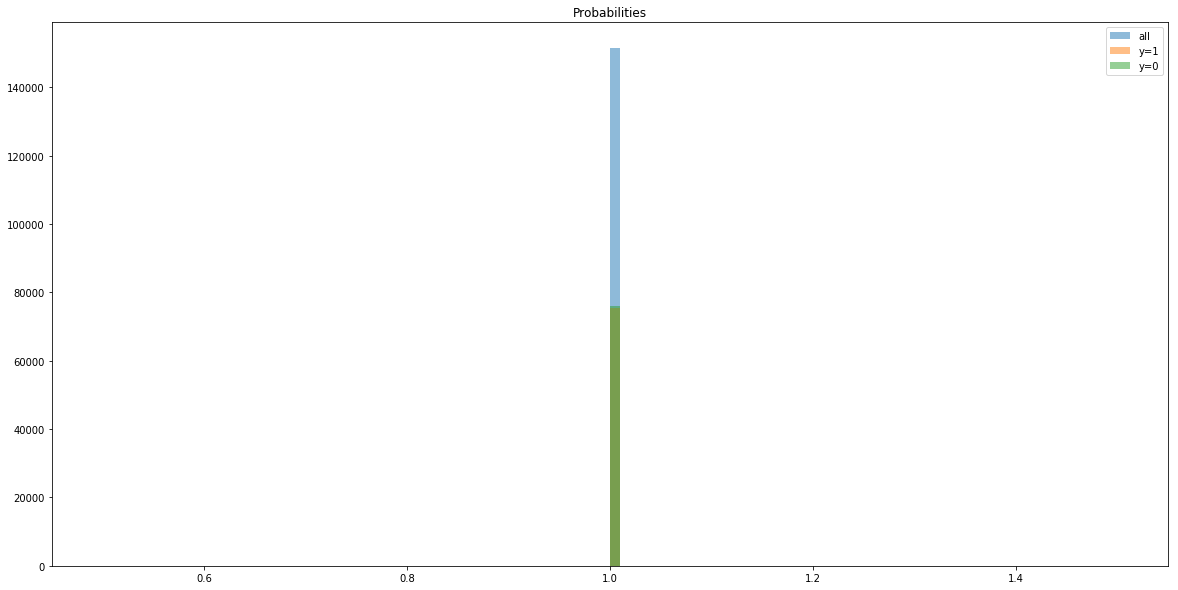

In [92]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('Probabilities')
plt.hist(df['p_id'], bins = 100, alpha = 0.5, label = 'all')
plt.hist(df[df['y_id']==1]['p_id'], bins = 100, alpha = 0.5, label = 'y=1')
plt.hist(df[df['y_id']==0]['p_id'], bins = 100, alpha = 0.5, label = 'y=0')

plt.legend()
plt.show()

In [49]:
# for res in df['']
def get_all_classification_metrics(y_truth, prob):
    from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score,\
                                accuracy_score, precision_score, recall_score,\
                                average_precision_score, roc_auc_score

    y = y_truth
    p = [i>0.5 for i in prob]
    t = prob
    print('classification_report')
    print(classification_report(y, p))
    print('\nconfusion_matrix')
    print(confusion_matrix(y, p)*1.0/len(y))
    print('\ncohen_kappa_score       %2.4f'%cohen_kappa_score(y, p))
    print('\naccuracy_score          %2.4f'%accuracy_score(y, p))
    print('\nprecision_score         %2.4f'%precision_score(y, p))
    print('\nrecall_score            %2.4f'%recall_score(y, p))
    print('\nroc-auc score           %2.4f'%roc_auc_score(y, p))
    print('\nprecision-recall score %2.4f'%average_precision_score(y, t))
    

y = df['y_id'].get_values()
p = (df['p_id']>0.5).get_values()
get_all_classification_metrics(y, p)

classification_report
              precision    recall  f1-score   support

       False       0.55      0.84      0.66     76000
        True       0.65      0.30      0.41     75519

   micro avg       0.57      0.57      0.57    151519
   macro avg       0.60      0.57      0.54    151519
weighted avg       0.60      0.57      0.54    151519


confusion_matrix
[[0.42069971 0.08088755]
 [0.34714458 0.15126816]]

cohen_kappa_score       0.1425

accuracy_score          0.5720

precision_score         0.6516

recall_score            0.3035

roc-auc score           0.5711

precision-recall score 0.5449


In [58]:
# df_test = pd.read_csv('../table/df_test.csv')
X_test = df_test[features].get_values()
from tqdm import tqdm_notebook
batch_size = 1024
y_predict = []
for ind in tqdm_notebook(range(int(X_test.shape[0]/batch_size)+1)):
    #print(model.predict_proba(X[ind*batch_size : (ind+1)*batch_size]))
    y_predict.extend(model.predict_proba(X_test[ind*batch_size : 
                                           min((ind+1)*batch_size, X.shape[0])]
                                        )[:,0])

In [61]:
df_test['p_id'] = y_predict
# for 

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


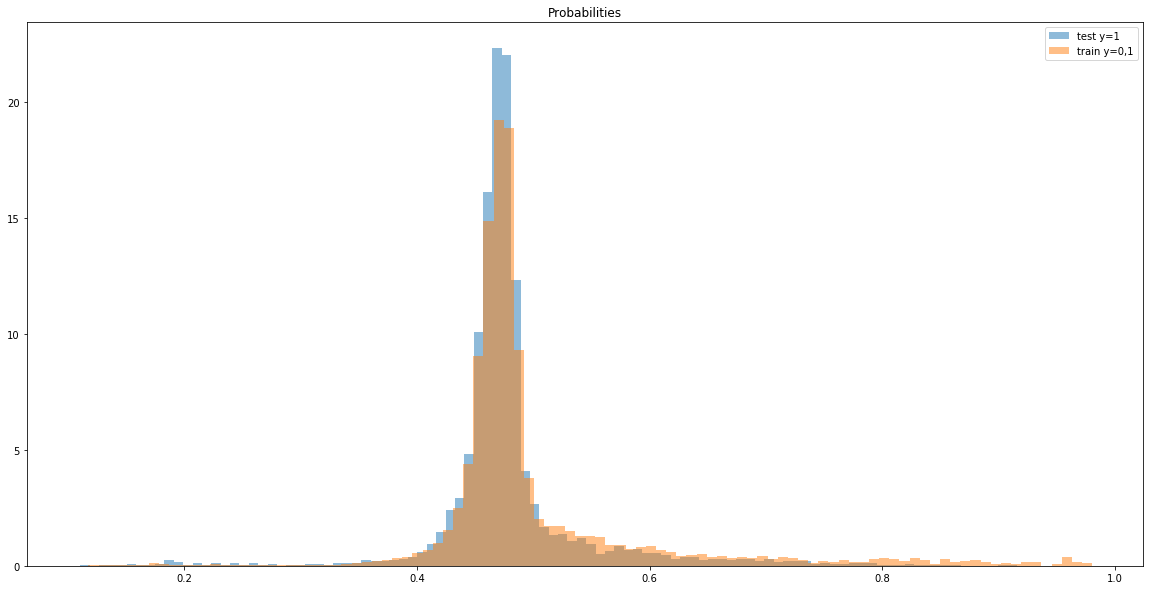

In [64]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 10))
plt.title('Probabilities')
plt.hist(df_test['p_id'], bins = 100, alpha = 0.5, label = 'test y=1', normed = True)
plt.hist(df['p_id'], bins = 100, alpha = 0.5, label = 'train y=0,1', normed = True)


plt.legend()
plt.show()

In [83]:
def create_dataset(df, n_pp, n_p, n_m):
    audio_features = list(filter(lambda x:'audio' in x, df.keys()))
    print('audio features', len(audio_features))

    video_features = list(filter(lambda x:'video' in x, df.keys()))
    print('video features', len(video_features))
    
    df = df.copy()
    np.random.seed(42)

    def ordered(l1,l2):
        return tuple([min(l1, l2), max(l1, l2)])

    def _create_pp(lst, n_pp=n_pp):
        np.random.shuffle(lst)
        n = min(len(lst), n_pp)
        return lst[:n]

    def _create_p(lst, n_p=n_p):
        if n_p>len(lst)*(len(lst)-1):
            print('Too big n_pp')
            n_p = len(lst)*(len(lst)-1)
            #maybe error here

        l1 = np.random.randint(0, len(lst), n_p*10)
        l2 = np.random.randint(0, len(lst), n_p*10)

        temp = [ordered(lst[i], lst[k]) for i,k in zip(l1, l2) if i!=k]
        res = []
        for i in temp:
            if i[0]==i[1]:
                print(i)
                raise ValueError('sosixuy')
            if not i in res:
                res.append(i)
                if len(res)>=n_p:
                    return res
        print('Something was wrong')
        return res

    _all_ids = set(df['IDu'].get_values())
    _global_id_was_in_pp = []
    def _create_m(lst, n_m=n_m):
        #global _all_ids
        not_in_list = list(set(_all_ids)-set(lst))
        lst_1 = lst.copy()
        lst_0 = not_in_list.copy()

        np.random.shuffle(lst_1)
        np.random.shuffle(lst_0)

        l1 = np.random.randint(0, len(lst_1), size = n_m*10)
        l0 = np.random.randint(0, len(lst_0), size = n_m*10)

        temp = [ordered(lst_1[i], lst_0[k]) for i,k in zip(l1, l0)]
        res = []
        for i in temp:
            if i in _global_id_was_in_pp:
                continue
            if not i in res:
                res.append(i)
                if len(res)>=n_m:
                    return res

    res = {'pp':[],
           'p' :[],
           'm' :[]
          }

    for ID, obj in tqdm_notebook(df[['ID', 'segm', 'IDu']].groupby('ID')):
        list_pp = _create_pp(obj['IDu'].get_values())
        list_p  = _create_p(obj['IDu'].get_values())
        list_m  = _create_m(obj['IDu'].get_values())
        res['pp'].extend(list_pp)
        res['p'].extend(list_p)
        res['m'].extend(list_m)
    #Checking correctness
    if len(set(res['pp'])&set(res['p']))!=0 or\
        len(set(res['pp'])&set(res['m']))!=0 or\
        len(set(res['p'])&set(res['m']))!=0:
        raise ValueError('Something wrong')

    print('pp\tp\tm')
    print(len(res['pp']), len(res['p']), len(res['m']))
    print(len(res['pp'])+len(res['p'])+len(res['m']))
    print('==='*2)
    print('devide by (n_p, n_pp, n_m)*df_train.shape[0]')
    print('pp\tp\tm')
    print(len(res['pp'])/n_pp/df['ID'].nunique(), 
          len(res['p'])/n_p/df['ID'].nunique(), 
          len(res['m'])/n_m/df['ID'].nunique())
    df.index = df['IDu']
    ind1 = [i for i in res['pp']]
    ind2 = [i for i in res['pp']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_pp = pd.concat([a,b], axis = 1)
    df_pp['y'] = 2

    ind1 = [i[0] for i in res['p']]
    ind2 = [i[1] for i in res['p']]
    
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_p = pd.concat([a,b], axis = 1)
    df_p['y'] = 1

    ind1 = [i[0] for i in res['m']]
    ind2 = [i[1] for i in res['m']]
    a = df.loc[ind1, audio_features]
    a['idu1'] = a.index
    a = a.reset_index()
    b = df.loc[ind2, video_features]
    b['idu2'] = b.index
    b = b.reset_index()

    df_m = pd.concat([a,b], axis = 1)
    df_m['y'] = 0
    df_train_final = pd.concat([df_p, df_pp, df_m])
    print('shape : ',df_train_final.shape)
    return df_train_final

n_pp = 100
n_p  = 300
n_m  = 9000
df_results = create_dataset(df_test.copy(), n_pp = n_pp, n_p = n_p, n_m = n_m)

audio features 512
video features 1000



pp	p	m
6247 19200 576000
601447
devide by (n_p, n_pp, n_m)*df_train.shape[0]
pp	p	m
0.97609375 1.0 1.0
shape :  (601447, 1517)


In [101]:
# %%time
# df_results.to_csv('../table/test_object.csv')

In [104]:
df_results[-10:].head()

,IDu,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,audio_105,...,video_992,video_993,video_994,video_995,video_996,video_997,video_998,video_999,idu2,y
575990,PYw4CGUfnPE0083,0.620926,0.057858,-0.200748,0.866219,0.530723,1.185128,1.466283,0.724852,2.084208,...,0.000064,0.000036,0.000089,0.000309,0.000061,0.000033,0.002118,0.000283,yCZmZ5cju3Y0019,0
575991,OXm6_v0rMCY0111,0.094463,-0.000315,0.272611,0.247727,0.991767,0.634711,1.117447,1.034132,1.718865,...,0.000066,0.000048,0.000095,0.000308,0.000135,0.000048,0.001663,0.000744,yCZmZ5cju3Y0024,0
575992,tvTRZJ-4EyI0004,1.546405,0.863989,-0.200462,-0.239473,-0.291735,2.563934,-0.235911,1.692751,2.165673,...,0.000057,0.000051,0.000103,0.000320,0.000143,0.000044,0.001415,0.000861,yCZmZ5cju3Y0008,0
575993,rMqayQ-U74s0097,0.045928,-0.032538,0.339385,-0.013318,0.725539,0.150522,0.075272,0.629855,1.520480,...,0.000046,0.000039,0.000070,0.000222,0.000130,0.000029,0.001255,0.000401,yCZmZ5cju3Y0063,0
575994,TGjl_SHbqr40132,-0.011562,0.262922,0.077088,-0.233647,0.086765,0.075203,0.674713,0.838962,1.731093,...,0.000042,0.000022,0.000057,0.000223,0.000042,0.000022,0.001921,0.000209,yCZmZ5cju3Y0021,0


In [105]:
df_results.shape
y_predict = get_predictions(model, df_results[features][-10:].get_values())

In [108]:
df_results[-10:][features]

,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,audio_105,audio_106,...,video_990,video_991,video_992,video_993,video_994,video_995,video_996,video_997,video_998,video_999
575990,0.620926,0.057858,-0.200748,0.866219,0.530723,1.185128,1.466283,0.724852,2.084208,0.639442,...,0.000918,0.000281,0.000064,0.000036,0.000089,0.000309,0.000061,0.000033,0.002118,0.000283
575991,0.094463,-0.000315,0.272611,0.247727,0.991767,0.634711,1.117447,1.034132,1.718865,0.968234,...,0.000884,0.000211,0.000066,0.000048,0.000095,0.000308,0.000135,0.000048,0.001663,0.000744
575992,1.546405,0.863989,-0.200462,-0.239473,-0.291735,2.563934,-0.235911,1.692751,2.165673,-0.481656,...,0.000431,0.000195,0.000057,0.000051,0.000103,0.000320,0.000143,0.000044,0.001415,0.000861
575993,0.045928,-0.032538,0.339385,-0.013318,0.725539,0.150522,0.075272,0.629855,1.520480,0.955522,...,0.000521,0.000227,0.000046,0.000039,0.000070,0.000222,0.000130,0.000029,0.001255,0.000401
575994,-0.011562,0.262922,0.077088,-0.233647,0.086765,0.075203,0.674713,0.838962,1.731093,0.692783,...,0.000729,0.000197,0.000042,0.000022,0.000057,0.000223,0.000042,0.000022,0.001921,0.000209
575995,0.954333,0.720130,0.328610,-0.210071,-0.375292,1.169562,-0.229202,0.920543,1.654919,0.167809,...,0.001004,0.000369,0.000110,0.000025,0.000121,0.000413,0.000029,0.000029,0.001560,0.000146
575996,0.472950,0.808397,0.383010,-0.348284,-0.519158,0.559706,0.862278,0.466255,1.156223,0.126006,...,0.000385,0.000268,0.000027,0.000038,0.000056,0.000243,0.000140,0.000023,0.001653,0.000275
575997,0.990685,0.683641,-0.123514,-0.618640,0.159317,1.874547,-0.338888,1.560841,2.074708,-0.292761,...,0.000884,0.000211,0.000066,0.000048,0.000095,0.000308,0.000135,0.000048,0.001663,0.000744
575998,0.403277,0.699824,0.154933,-0.439666,0.566066,1.600322,-0.175850,2.209169,1.624616,-0.361947,...,0.001086,0.000348,0.000074,0.000057,0.000112,0.000369,0.000066,0.000047,0.002024,0.000365
575999,0.047544,0.289782,0.193948,-0.154625,0.378890,0.747796,0.256438,0.736268,1.969266,0.693030,...,0.000431,0.000195,0.000057,0.000051,0.000103,0.000320,0.000143,0.000044,0.001415,0.000861


In [106]:
print(y_predict)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11929261898176552793
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11578254437809033198
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6273740261834725298
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10745128551
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2462959724264139210
physical_device_desc: "device: 0, name: GeForce RTX 2080 Ti, pci bus id: 0000:04:00.0, compute capability: 7.5"
]


In [6]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
# from t import device
# tf.device
import tensorflow as tf
with tf.device(11040818267891171754):
    print(1)

AttributeError: 'int' object has no attribute 'split'